In [0]:
import pandas as pd
import numpy as np

In [0]:
train = pd.read_csv('data.csv')
len(train)

30697

In [0]:
train['is_goal'].value_counts()
train['type_of_shot'].value_counts()
train['type_of_combined_shot'].value_counts()

train['area_of_shot'].value_counts()
train['shot_basics'].value_counts()
train['range_of_shot'].value_counts()
train.groupby(['type_of_combined_shot', 'area_of_shot', 'shot_basics'])['is_goal'].value_counts()
train.groupby(['type_of_combined_shot', 'area_of_shot', 'shot_basics'])['range_of_shot'].value_counts()
train.groupby(['type_of_shot', 'area_of_shot', 'shot_basics'])['range_of_shot'].value_counts()

In [0]:
for i in range(0,30697):
  if pd.isnull(train.iloc[i,6]):
    if train.iloc[i,21] == train.iloc[i-1,21]:
      train.iloc[i,6] = train.iloc[i-1,6]
    else:
      train.iloc[i,6] = train.iloc[i+1,6]
      
  if pd.isnull(train.iloc[i,7]):
    if train.iloc[i,21] == train.iloc[i-1,21]:
      train.iloc[i,7] = train.iloc[i-1,7]
    else:
      train.iloc[i,7] = train.iloc[i+1,7]
      
  if pd.isnull(train.iloc[i,15]):
    if train.iloc[i,21] == train.iloc[i-1,21]:
      train.iloc[i,15] = train.iloc[i-1,15]
    else:
      train.iloc[i,15] = train.iloc[i+1,15]
      
  if pd.isnull(train.iloc[i,16]):
    if train.iloc[i,21] == train.iloc[i-1,21]:
      train.iloc[i,16] = train.iloc[i-1,16]
    else:
      train.iloc[i,16] = train.iloc[i+1,16]
      
  if pd.isnull(train.iloc[i,18]):
    if train.iloc[i,21] == train.iloc[i-1,21]:
      train.iloc[i,18] = train.iloc[i-1,18]
    else:
      train.iloc[i,18] = train.iloc[i+1,18]
      
      

In [0]:
for i in range(0,30697):
  if pd.isnull(train.iloc[i,5]):
    train.iloc[i,5] = train.iloc[i,24]
  if pd.isnull(train.iloc[i,4]):
    train.iloc[i,4] = train.iloc[i,23]
    
  if pd.isnull(train.iloc[i,8]):
    train.iloc[i,8] = train.iloc[i,-2]
  if pd.isnull(train.iloc[i,9]):
    train.iloc[i,9] = train.iloc[i,-1]

In [0]:
for i in range(0,30697):
  if pd.isnull(train.iloc[i,1]):
    if train.iloc[i,21] == train.iloc[i-1,21]:
      train.iloc[i,1] = train.iloc[i-1,1]+1
    else:
      train.iloc[i,1] = train.iloc[i+1,1]-1

In [0]:
for i in range(0,30697):
  if (train.iloc[i,20] == 'shot - 5') or (train.iloc[i,20] == 'shot - 4') or (train.iloc[i,20] == 'shot - 1') or (train.iloc[i,19] == 'shot - 39') or (train.iloc[i,19] == 'shot - 4'):
    if pd.isnull(train.iloc[i,11]):
      train.iloc[i,11] = 'Center(C)'
    if pd.isnull(train.iloc[i,12]):
      train.iloc[i,12] = 'Goal Area'
    if pd.isnull(train.iloc[i,13]):
      train.iloc[i,13] = 'Less Than 8 ft.'
      

In [0]:
train.iloc[15,11]

'Center(C)'

In [0]:
train['location_x'] = train['location_x'].fillna(-9999)
train['location_y'] = train['location_y'].fillna(-9999)

In [0]:
train['remaining_time'] = train['remaining_min']*60 + train['remaining_sec']
train['remaining_time.1'] = train['remaining_min.1']*60 + train['remaining_sec.1']

In [0]:
def place(x):
  if ("vs." in str(x[16])):
    return 1
  else:
    return 0
  
train['place'] = train.apply(place, axis = 1)

In [0]:
vv= train.groupby(['date_of_game'])['is_goal'].count()
train['attempts']= train['date_of_game'].map(vv)

In [0]:
train['type_of_shot'].value_counts()

shot - 39    1445
shot - 36    1292
shot - 4     1129
shot - 15     701
shot - 38     676
shot - 44     609
shot - 43     400
shot - 17     382
shot - 12     361
shot - 52     338
shot - 46     320
shot - 32     303
shot - 56     290
shot - 49     222
shot - 31     218
shot - 1      213
shot - 27     203
shot - 10     197
shot - 51     196
shot - 55     196
shot - 26     194
shot - 18     185
shot - 29     182
shot - 24     179
shot - 9      174
shot - 16     173
shot - 22     173
shot - 20     169
shot - 54     168
shot - 19     168
shot - 3      165
shot - 21     165
shot - 48     163
shot - 5      160
shot - 2      160
shot - 42     159
shot - 30     158
shot - 53     157
shot - 13     157
shot - 6      152
shot - 23     152
shot - 8      152
shot - 45     151
shot - 37     150
shot - 50     145
shot - 28     144
shot - 40     143
shot - 41     143
shot - 14     142
shot - 35     141
shot - 25     138
shot - 11     137
shot - 33     131
shot - 7      129
shot - 34     129
shot - 0  

In [0]:
def power1(x):
  if x>7:
    return -999
  else:
    return x
train['power_of_shot'] = train['power_of_shot'].apply(power1)

In [0]:
train['shot_basics'].fillna('Mid Range', inplace = True)
train['area_of_shot'].fillna('Center(C)', inplace = True)

In [0]:
cols = ['match_event_id', 'remaining_time.1', 'attempts','location_x', 'location_y', 'remaining_min', 'power_of_shot', 'knockout_match', 'place','game_season', 'remaining_sec', 'distance_of_shot', 'is_goal',	'area_of_shot',	'shot_basics',	'range_of_shot', 'type_of_shot',	'type_of_combined_shot', 'remaining_time', 'remaining_min.1',
       'power_of_shot.1', 'knockout_match.1', 'remaining_sec.1',
       'distance_of_shot.1']

In [0]:
train_new = train[cols]

In [0]:
train_new1 = pd.get_dummies(train_new, columns = ['game_season', 'area_of_shot',	'shot_basics',	'range_of_shot', 'type_of_shot',	'type_of_combined_shot'])

In [0]:
train_new2 = train_new1[~pd.isnull(train_new1['is_goal'])]
test = train_new1[pd.isnull(train_new1['is_goal'])]
y = train_new2['is_goal']
train_new2 = train_new2.drop(['is_goal'], axis = 1)
test = test.drop(['is_goal'], axis = 1)

In [0]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(train_new2, y)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

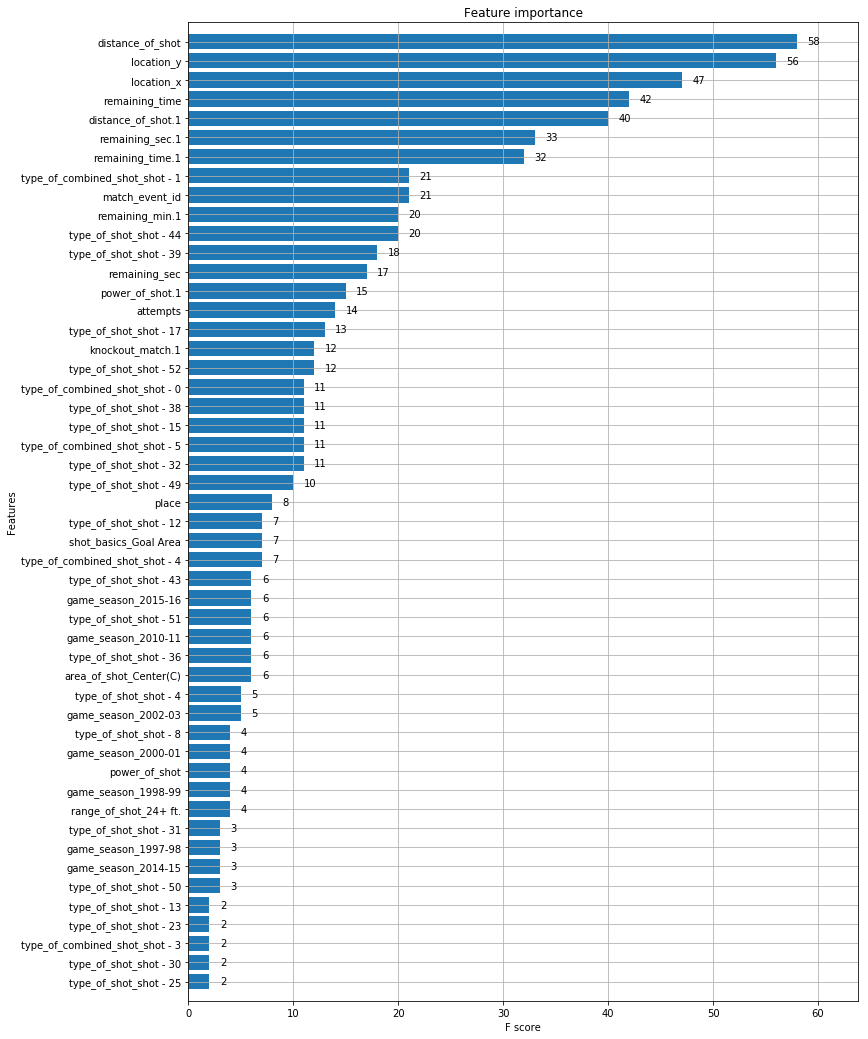

In [0]:
import matplotlib.pyplot as plt
import xgboost
fig, ax = plt.subplots(figsize=(12,18))
xgboost.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show()

In [0]:
z = model.predict_proba(test)

In [0]:
for i in range(0,30697):
  if pd.isnull(train.iloc[i,17]):
    if ~pd.isnull(train.iloc[i-1,17]):
      train.iloc[i,17] = train.iloc[i-1,17]+1
    else:
      train.iloc[i,17] = train.iloc[i+1,17]-1

In [0]:
ttt = train[pd.isnull(train['is_goal'])]

sub = pd.DataFrame()
sub['shot_id_number'] = ttt['shot_id_number']
sub['is_goal'] = z[:,0]
sub.to_csv('sub88888888.csv')

'type_of_combined_shot'